In [1]:
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(
    font_scale=1.3,
    style="whitegrid", 
    rc={'figure.figsize':(9,4)})

In [2]:
df = pd.read_csv('/Users/ilamosin/abTest_pet/app_logs.csv', parse_dates=['date'])
df.head(5)

,date,user_id,exp_group,session_id,session_length,device,order_cnt,price,quantity_cnt
0,2022-06-21,1727468184902936832,0,16557919071727468184902936832,1752,mobile,0,0.0,0
1,2022-06-21,3556219827372626733,0,16558186423556219827372626733,86,mobile,0,0.0,0
2,2022-06-21,2136855388003761026,0,16558402842136855388003761026,222,mobile,0,0.0,0
3,2022-06-21,4593970126020001597,0,16558003654593970126020001597,400,mobile,0,0.0,0
4,2022-06-21,3962568860806737949,1,16558324233962568860806737949,1300,mobile,0,0.0,0


## EDA (exploratory data analysis)

We released new interface feature on all platforms and want to know is it helpful for our users and is there profit for our product and business.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269142 entries, 0 to 269141
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            269142 non-null  datetime64[ns]
 1   user_id         269142 non-null  int64         
 2   exp_group       269142 non-null  int64         
 3   session_id      269142 non-null  object        
 4   session_length  269142 non-null  int64         
 5   device          269142 non-null  object        
 6   order_cnt       269142 non-null  int64         
 7   price           269142 non-null  float64       
 8   quantity_cnt    269142 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.5+ MB


In [4]:
print(f'Devices which users use: {df.device.unique()}')
print(f'Unique users count: {df.user_id.nunique()}')
print(f'Unique session count: {df.session_id.nunique()}')
print(f'Max date: {df.date.max()}')
print(f'Min date: {df.date.min()}')
print(f'Diff between count session_id and unique session_id : {df.session_id.count()-df.session_id.nunique()}')

Devices which users use: ['mobile' 'desktop' 'tablet']
Unique users count: 68287
Unique session count: 267929
Max date: 2022-07-13 00:00:00
Min date: 2022-06-21 00:00:00
Diff between count session_id and unique session_id : 1213


We have diff between count session_id and unique session_id. Lets see reason

In [5]:
df\
    .groupby(['user_id'])\
    .agg({'session_id':'count'})\
    .rename(columns={'session_id':'count_s'})\
    .query('count_s>1')\
    .sort_values('count_s', ascending=False)\
    .reset_index()

,user_id,count_s
0,7377259055888388543,174
1,2643534565406623178,98
2,5649845706405562462,76
3,7460365642247924721,71
4,7369859312574859099,69
...,...,...
43618,6467165119456300660,2
43619,6468351909120185336,2
43620,6469145490238627906,2
43621,2498253306598377956,2


In [6]:
df\
    .groupby(['session_id'])\
    .agg({'user_id':'count'})\
    .rename(columns={'user_id':'count_s'})\
    .sort_values('count_s', ascending=False)\
    .reset_index()

,session_id,count_s
0,16560175507409553825524332660,2
1,16559276085512268394876973018,2
2,1657399292201521318881768162,2
3,16575709214204538462046366116,2
4,16573992148146586641762132070,2
...,...,...
267924,16563990755253181081283755878,1
267925,16563990788523577941634717732,1
267926,1656399079289698032552999956,1
267927,16563990805888036677082088496,1


In [7]:
u_1 = df[df['user_id']==6087415308146188769]
u_1.sort_values('session_id')

,date,user_id,exp_group,session_id,session_length,device,order_cnt,price,quantity_cnt
21538,2022-06-22,6087415308146188769,1,16559187906087415308146188769,1490,mobile,0,0.0,0
19002,2022-06-22,6087415308146188769,1,16559205736087415308146188769,444,mobile,0,0.0,0
123840,2022-06-30,6087415308146188769,1,16566202796087415308146188769,953,mobile,0,0.0,0
140215,2022-07-02,6087415308146188769,1,16567659866087415308146188769,321,mobile,0,0.0,0
140183,2022-07-02,6087415308146188769,1,16567732036087415308146188769,1516,mobile,0,0.0,0
143798,2022-07-02,6087415308146188769,1,16567944336087415308146188769,1149,mobile,0,0.0,0
149475,2022-07-03,6087415308146188769,1,16567944336087415308146188769,895,mobile,0,0.0,0
149171,2022-07-03,6087415308146188769,1,16568252596087415308146188769,567,mobile,0,0.0,0
153690,2022-07-03,6087415308146188769,1,16568343986087415308146188769,16,mobile,0,0.0,0
153601,2022-07-03,6087415308146188769,1,16568538586087415308146188769,1003,mobile,0,0.0,0


In [8]:
16567944336087415308146188769==16567944336087415308146188769

True

In [9]:
u_2 = df[df['user_id']==6178250370357987265]
u_2.sort_values('session_id')

,date,user_id,exp_group,session_id,session_length,device,order_cnt,price,quantity_cnt
5161,2022-06-21,6178250370357987265,1,16558445156178250370357987265,633,mobile,0,0.0,0
23781,2022-06-22,6178250370357987265,1,16558445156178250370357987265,316,mobile,0,0.0,0
31597,2022-06-23,6178250370357987265,1,16559587326178250370357987265,1683,mobile,0,0.0,0
48387,2022-06-24,6178250370357987265,1,16560593176178250370357987265,577,mobile,0,0.0,0
51182,2022-06-24,6178250370357987265,1,16560830506178250370357987265,225,mobile,0,0.0,0
171883,2022-07-05,6178250370357987265,1,16569693906178250370357987265,1511,mobile,0,0.0,0
223502,2022-07-09,6178250370357987265,1,16573493266178250370357987265,779,mobile,0,0.0,0
259888,2022-07-13,6178250370357987265,1,16577372076178250370357987265,1865,mobile,0,0.0,0


In [10]:
16558445156178250370357987265==16558445156178250370357987265

True

In [11]:
633+316

949

The reason why we have duplicated session_id is that users can start sesion at 23.59 PM 23.04.2022 and finish as 00.30 24.04.2022 

I think, we have app where users make orders, something like marketplace. 
Users can make their orders from devices like mobile, desktop, tablet.
Signals which we have: session_length, order_cnt, price, quantity_cnt

Now lets aggregate signals to the metriсs, some of it - average check, asl(Average session length), arpu, arppu, count of session, Total number of orders

Using sql for this

conversion: 
conversion to payment 

users:
arppu = sum(price)/sum(user_id which make order)
arpu = sum(price)/sum(user_id) 
asl = ((sum sessions length)/(sum count ssessions))
count of session = count of seesion on one user

ratio metrics:
average check = sum(price)/count(price)
average number of orders in the check
percentage of sessions that ended in payment

## 2. Aggregating signals to the metrics

## 2.1 SQL

In [12]:
con = sqlite3.connect('db')

In [13]:
df.to_sql('metrics', con, index=False, if_exists='replace')

269142

In [229]:
sql = '''
with pre_agg_signals as (
        SELECT 
            user_id,
            exp_group,
            device,
            iif(date<'2022-06-30', 0, 1) as is_exp_period,
            session_id,
            
            sum(price) as spendings,
            sum(quantity_cnt) as goods_cnt,
            sum(order_cnt) as order_cnt,
            
            iif(sum(price)>0, 1, 0) as is_session_paid,
            sum(session_length) as total_session_log_length
        FROM 
            metrics
        GROUP BY
            user_id,
            exp_group,
            device,
            is_exp_period,
            session_id
)
SELECT 
    user_id,
    exp_group,
    device,
    is_exp_period,
    
    sum(spendings) as spendings,
    sum(goods_cnt) as goods_cnt,
    sum(order_cnt) as order_cnt,
    
    iif(sum(is_session_paid)>0, 1, 0) as is_paid,
    
    sum(is_session_paid) as paid_session_cnt,
    count(distinct session_id) as session_cnt,
    
    sum(log(total_session_log_length)) total_session_log_length
FROM
    pre_agg_signals
GROUP BY
    user_id,
    exp_group,
    device,
    is_exp_period
'''

In [15]:
df_f = pd.read_sql(sql, con)

In [16]:
def select(sql):
    return pd.read_sql(sql,con)

In [17]:
ag_sign = select(sql)
ag_sign.head()

,user_id,exp_group,device,is_exp_period,spendings,goods_cnt,order_cnt,is_paid,paid_session_cnt,session_cnt,total_session_log_length
0,125741107230500,0,mobile,1,0.0,0,0,0,0,2,5.407785
1,667585499425385,0,mobile,1,0.0,0,0,0,0,1,2.635484
2,681720336100105,0,mobile,1,0.0,0,0,0,0,4,9.057257
3,767791454221621,1,desktop,1,0.0,0,0,0,0,2,4.291813
4,808009533082155,0,desktop,0,23633.4,66,1,1,1,2,5.044744


In [18]:
ag_sign.user_id.nunique()

68287

## 2.2 DF transofmation

Split dataframe on two (befor and after start of the exp), and then merge them for using cuped

In [253]:
ag_sign_bfr_exp_p = ag_sign.query('is_exp_period==0')
ag_sign_aftr_exp_p = ag_sign.query('is_exp_period==1')

full_exp = ag_sign_aftr_exp_p.merge(ag_sign_bfr_exp_p, on = 'user_id', how = 'left', suffixes=('_cur', '_bfr'))
full_exp.head()

,user_id,exp_group_cur,device_cur,is_exp_period_cur,spendings_cur,goods_cnt_cur,order_cnt_cur,is_paid_cur,paid_session_cnt_cur,session_cnt_cur,...,exp_group_bfr,device_bfr,is_exp_period_bfr,spendings_bfr,goods_cnt_bfr,order_cnt_bfr,is_paid_bfr,paid_session_cnt_bfr,session_cnt_bfr,total_session_log_length_bfr
0,125741107230500,0,mobile,1,0.0,0,0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667585499425385,0,mobile,1,0.0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,681720336100105,0,mobile,1,0.0,0,0,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,767791454221621,1,desktop,1,0.0,0,0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,808009533082155,0,desktop,1,0.0,0,0,0,0,1,...,0.0,desktop,0.0,23633.4,66.0,1.0,1.0,1.0,2.0,5.044744


In [254]:
full_exp.isna().sum()

user_id                             0
exp_group_cur                       0
device_cur                          0
is_exp_period_cur                   0
spendings_cur                       0
goods_cnt_cur                       0
order_cnt_cur                       0
is_paid_cur                         0
paid_session_cnt_cur                0
session_cnt_cur                     0
total_session_log_length_cur        0
exp_group_bfr                   26817
device_bfr                      26817
is_exp_period_bfr               26817
spendings_bfr                   26817
goods_cnt_bfr                   26817
order_cnt_bfr                   26817
is_paid_bfr                     26817
paid_session_cnt_bfr            26817
session_cnt_bfr                 26817
total_session_log_length_bfr    26817
dtype: int64

In [255]:
full_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50080 entries, 0 to 50079
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       50080 non-null  int64  
 1   exp_group_cur                 50080 non-null  int64  
 2   device_cur                    50080 non-null  object 
 3   is_exp_period_cur             50080 non-null  int64  
 4   spendings_cur                 50080 non-null  float64
 5   goods_cnt_cur                 50080 non-null  int64  
 6   order_cnt_cur                 50080 non-null  int64  
 7   is_paid_cur                   50080 non-null  int64  
 8   paid_session_cnt_cur          50080 non-null  int64  
 9   session_cnt_cur               50080 non-null  int64  
 10  total_session_log_length_cur  50080 non-null  float64
 11  exp_group_bfr                 23263 non-null  float64
 12  device_bfr                    23263 non-null  object 
 13  i

In [256]:
#some transofmation for columns
full_exp = full_exp[['exp_group_cur', 'user_id', 'device_cur', 'is_paid_cur',
                    'spendings_cur', 'goods_cnt_cur', 'order_cnt_cur', 'paid_session_cnt_cur',
                         'total_session_log_length_cur', 'session_cnt_cur',
                      'is_paid_bfr', 'spendings_bfr', 'goods_cnt_bfr', 'order_cnt_bfr', 
                     'paid_session_cnt_bfr', 'total_session_log_length_bfr', 'session_cnt_bfr']]

full_exp = full_exp.rename(columns={'exp_group_cur':'exp_group','device_cur':'device'
                                   }).fillna(0)

In [257]:
full_exp.head()

,exp_group,user_id,device,is_paid_cur,spendings_cur,goods_cnt_cur,order_cnt_cur,paid_session_cnt_cur,total_session_log_length_cur,session_cnt_cur,is_paid_bfr,spendings_bfr,goods_cnt_bfr,order_cnt_bfr,paid_session_cnt_bfr,total_session_log_length_bfr,session_cnt_bfr
0,0,125741107230500,mobile,0,0.0,0,0,0,5.407785,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,667585499425385,mobile,0,0.0,0,0,0,2.635484,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,681720336100105,mobile,0,0.0,0,0,0,9.057257,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1,767791454221621,desktop,0,0.0,0,0,0,4.291813,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,808009533082155,desktop,0,0.0,0,0,0,2.721811,1,1.0,23633.4,66.0,1.0,1.0,5.044744,2.0


In [258]:
full_exp.user_id.nunique()

49985

In [259]:
full_exp['spendings_cur'] = full_exp['spendings_cur'].round(2)
full_exp['is_paid_bfr'] = full_exp['is_paid_bfr'].astype('int64')
full_exp['spendings_bfr'] = full_exp['spendings_bfr'].round(2)
full_exp['goods_cnt_bfr'] = full_exp['goods_cnt_bfr'].astype('int64')
full_exp['order_cnt_bfr'] = full_exp['order_cnt_bfr'].astype('int64')
full_exp['paid_session_cnt_bfr'] = full_exp['paid_session_cnt_bfr'].astype('int64')
full_exp['total_session_log_length_bfr'] = full_exp['total_session_log_length_bfr'].astype('int64')
full_exp['session_cnt_bfr'] = full_exp['session_cnt_bfr'].astype('int64')

# 3. Metrics research and Stat-testing

In [260]:
# aa_test simulations using ttest
def aa_test_ttest(signals, n_trails=10000, alpha=0.05):
    p_vals = np.array([])
    for i in tqdm(range(n_trails)):
        hits = np.random.random(len(signals))<0.5
        s_1, s_2 = signals[hits], signals[~hits]
        p_vals = np.append(p_vals, stats.ttest_ind(s_1,s_2)[1])
    fpr = sum(p_vals<alpha)/n_trails
    
    plt.hist(p_vals, bins = 100)
    plt.xlabel('pvalues')
    plt.style.use('ggplot')
    plt.ylabel('frequency')
    plt.title("Histogram of ttest A/A simulations ")
    plt.show()
    
    return fpr

In [261]:
# aa_test simulations using chi2 test
def aa_test_chi2(signals, n_trails=10000, alpha=0.05):
    p_vals = np.array([])
    
    for i in tqdm(range(n_trails)):
        
        hits = np.random.random(len(signals))<0.5
        s_1, s_2 = signals[hits], signals[~hits]
        
        conv_s1, non_conv_s1 = sum(s_1['is_paid_cur']==1), sum(s_1['is_paid_cur']==0)
        conv_s2, non_conv_s2 = sum(s_2['is_paid_cur']==1), sum(s_2['is_paid_cur']==0)
        
        cross_tab = np.array([[conv_s1, non_conv_s1], [conv_s2, non_conv_s2]])
        
        p_vals = np.append(p_vals, stats.chi2_contingency(cross_tab)[1])
              
    fpr = sum(p_vals<alpha)/n_trails
    
    plt.hist(p_vals, bins = 100)
    plt.xlabel('pvalues')
    plt.style.use('ggplot')
    plt.ylabel('frequency')
    plt.title("Histogram of ttest A/A simulations ")
    plt.show()
    
    return fpr

In [262]:
def get_mde(n_c, sd_c, n_t, sd_t, alpha=0.05, power=0.8):
    quantiles = stats.norm.ppf(q=1-alpha/2) + stats.norm.ppf(q=power)
    se = np.sqrt((sd_t**2 / n_t) + (sd_c**2 / n_c))
    return quantiles * se

## 3.1. Binomial 

### Conversion

In [263]:
conv = full_exp[['exp_group', 'device', 'user_id', 'is_paid_cur']]
conv.head()  

,exp_group,device,user_id,is_paid_cur
0,0,mobile,125741107230500,0
1,0,mobile,667585499425385,0
2,0,mobile,681720336100105,0
3,1,desktop,767791454221621,0
4,0,desktop,808009533082155,0


In [264]:
c = conv.groupby(['exp_group', 'device'], as_index=False)\
    .agg(count_u=('user_id','count'))\
    .sort_values('device')

<AxesSubplot:xlabel='device', ylabel='count_u'>

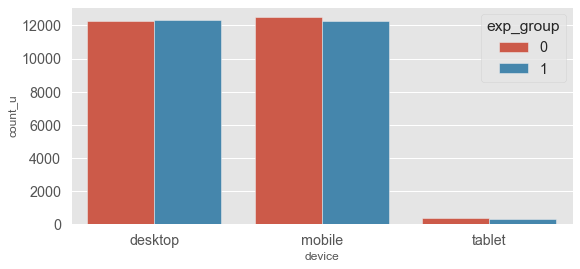

In [265]:
sns.barplot(data= c, y = 'count_u' ,x  = 'device', hue='exp_group')

Checking full conv

In [266]:
print(f"conv_full_contr = {conv[(conv['is_paid_cur']!=0) & (conv['exp_group']==0)].is_paid_cur.count()/conv[conv['exp_group']==0].exp_group.count()}")
print(f"conv_full_test = {conv[(conv['is_paid_cur']!=0) & (conv['exp_group']==1)].is_paid_cur.count()/conv[conv['exp_group']==1].exp_group.count()}")

conv_full_contr = 0.1381202290076336
conv_full_test = 0.1465420410783055


In [267]:
desktop_conv = conv[conv['device']=='desktop']
desktop_conv = desktop_conv[['exp_group','user_id','is_paid_cur']]
desktop_crosstab = pd.crosstab(desktop_conv.is_paid_cur, desktop_conv.exp_group)
desktop_crosstab

exp_group,0,1
is_paid_cur,,
0,9718,9616
1,2577,2694


Checking desktop conv

In [268]:
print(f"conv_desktop_contr = {desktop_conv[(desktop_conv['is_paid_cur']!=0) & (desktop_conv['exp_group']==0)].is_paid_cur.count()/desktop_conv[desktop_conv['exp_group']==0].exp_group.count()}")
print(f"conv_desktop_test = {desktop_conv[(desktop_conv['is_paid_cur']!=0) & (desktop_conv['exp_group']==1)].is_paid_cur.count()/desktop_conv[desktop_conv['exp_group']==1].exp_group.count()}")

conv_desktop_contr = 0.20959739731598212
conv_desktop_test = 0.21884646628757107


In [269]:
stat, p, dof, expected = stats.chi2_contingency(desktop_crosstab)
stat, p

(3.0713126698312383, 0.07968510444629265)

In [270]:
stats.ttest_ind(desktop_conv[desktop_conv['exp_group']==0].is_paid_cur, desktop_conv[desktop_conv['exp_group']==1].is_paid_cur)

Ttest_indResult(statistic=-1.7680948900666364, pvalue=0.07705743260493729)

Checking mobile conv

In [271]:
mobile_conv = conv[conv['device']=='mobile']
mobile_conv = mobile_conv[['exp_group','user_id','is_paid_cur']]
mobile_crosstab = pd.crosstab(mobile_conv.is_paid_cur, mobile_conv.exp_group)
mobile_crosstab

exp_group,0,1
is_paid_cur,,
0,11631,11380
1,865,916


In [272]:
print(f"conv_mobile_contr = {mobile_conv[(mobile_conv['is_paid_cur']!=0) & (mobile_conv['exp_group']==0)].is_paid_cur.count()/mobile_conv[mobile_conv['exp_group']==0].exp_group.count()}")
print(f"conv_mobile_test = {mobile_conv[(mobile_conv['is_paid_cur']!=0) & (mobile_conv['exp_group']==1)].is_paid_cur.count()/mobile_conv[mobile_conv['exp_group']==1].exp_group.count()}")

conv_mobile_contr = 0.06922215108834827
conv_mobile_test = 0.07449577098243332


In [273]:
stat, p, dof, expected = stats.chi2_contingency(mobile_crosstab)
stat, p

(2.506537523339744, 0.11337478669751457)

In [274]:
stats.ttest_ind(mobile_conv[mobile_conv['exp_group']==0].is_paid_cur, mobile_conv[mobile_conv['exp_group']==1].is_paid_cur)

Ttest_indResult(statistic=-1.6078201226161073, pvalue=0.10788731485440034)

Checking tablet conv

In [275]:
tablet_conv = conv[conv['device']=='tablet']
tablet_conv = tablet_conv[['exp_group','user_id','is_paid_cur']]
tablet_crosstab = pd.crosstab(tablet_conv.is_paid_cur, tablet_conv.exp_group)
tablet_crosstab

exp_group,0,1
is_paid_cur,,
0,329,279
1,32,43


In [276]:
print(f"conv_mobile_contr = {tablet_conv[(tablet_conv['is_paid_cur']!=0) & (tablet_conv['exp_group']==0)].is_paid_cur.count()/tablet_conv[tablet_conv['exp_group']==0].exp_group.count()}")
print(f"conv_mobile_test = {tablet_conv[(tablet_conv['is_paid_cur']!=0) & (tablet_conv['exp_group']==1)].is_paid_cur.count()/tablet_conv[tablet_conv['exp_group']==1].exp_group.count()}")

conv_mobile_contr = 0.0886426592797784
conv_mobile_test = 0.13354037267080746


In [277]:
stat, p, dof, expected = stats.chi2_contingency(tablet_crosstab)
stat, p

(3.0654013444935817, 0.07997541113120611)

In [278]:
stats.ttest_ind(tablet_conv[tablet_conv['exp_group']==0].is_paid_cur, tablet_conv[tablet_conv['exp_group']==1].is_paid_cur)

Ttest_indResult(statistic=-1.875493697547632, pvalue=0.06115246803267521)

#### Conversion A/A test

  0%|          | 0/10000 [00:00<?, ?it/s]

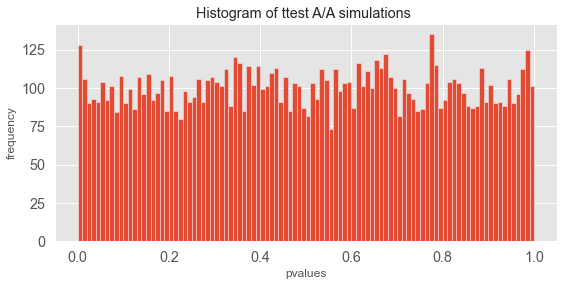

0.0508

In [279]:
signals = conv[['exp_group', 'is_paid_cur']]
signals_conv = signals[signals['exp_group']==0]

aa_test_ttest(signals_conv)

  0%|          | 0/10000 [00:00<?, ?it/s]

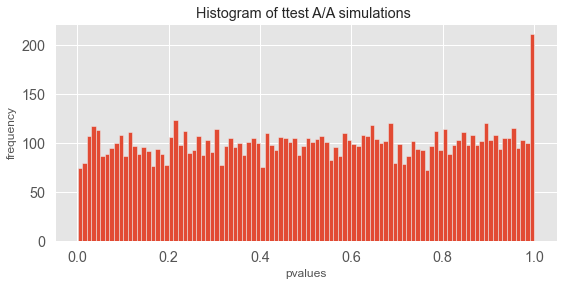

0.0491

In [280]:
aa_test_chi2(signals_conv)

In [281]:
contr_conv_full = conv[conv['exp_group']==0]
test_conv_full = conv[conv['exp_group']==1]

In [306]:
p_chi2  = stats.chi2_contingency(pd.crosstab(conv.is_paid_cur, conv.exp_group))[1]
p_ttest = stats.ttest_ind(contr_conv_full.is_paid_cur, test_conv_full.is_paid_cur)[1]
    
diff = test_conv_full.is_paid_cur.mean()-contr_conv_full.is_paid_cur.mean()
diff_abs = diff*100/contr_conv_full.is_paid_cur.mean()

mde = get_mde(len(contr_conv_full),
      np.std((contr_conv_full.is_paid_cur), ddof=1),
      len(test_conv_full),
      np.std((test_conv_full.is_paid_cur), ddof=1), alpha=0.05, power=0.8)


conv_df = pd.DataFrame({'metric_name':'conv', 'device':'full', 'diff':[diff], 'diff%':[diff_abs],
                        'mde':[mde], 'p_val_chi2':[p_chi2], 'p_val_ttest':[p_ttest]})
conv_df

,metric_name,device,diff,diff%,mde,p_val_chi2,p_val_ttest
0,conv,full,0.008422,6.09745,0.008748,0.007265,0.006991


In [283]:
devices = ['desktop', 'mobile', 'tablet']
metric_name = [] 
device = []
diff_lst = []
diff_abs_lst = []
p_val_chi2 = []
p_val_ttest = []
mde_lst = []


for i in range(len(devices)):
    conv_new = conv[conv['device']==devices[i]]
    conv_d = conv_new[['exp_group','user_id','is_paid_cur']]
    crosstab = pd.crosstab(conv_d.is_paid_cur, conv_d.exp_group)
    
    p_chi2 = stats.chi2_contingency(crosstab)[1]
    
    contr_conv = conv_d[conv_d['exp_group']==0]
    test_conv = conv_d[conv_d['exp_group']==1]
    
    p_ttest = stats.ttest_ind(contr_conv.is_paid_cur, test_conv.is_paid_cur)[1]
    
    diff = test_conv.is_paid_cur.mean()-contr_conv.is_paid_cur.mean()
    diff_abs = diff*100/contr_conv.is_paid_cur.mean()
    
    mde = get_mde(len(contr_conv),
          np.std((contr_conv.is_paid_cur), ddof=1),
          len(test_conv),
          np.std((test_conv.is_paid_cur), ddof=1), alpha=0.05, power=0.8)
    
    metric_name.append('conv')
    device.append(devices[i])
    diff_lst.append(diff)
    diff_abs_lst.append(diff_abs)
    mde_lst.append(mde)
    p_val_chi2.append(p_chi2)
    p_val_ttest.append(p_ttest)
    
    result_df = pd.DataFrame({'metric_name':metric_name, 'device':device, 'diff':diff_lst, 'diff%':diff_abs_lst,
                            'mde':mde_lst, 'p_val_chi2':p_val_chi2,'p_val_ttest':p_val_ttest})
    
result_df_1 = pd.concat([result_df, conv_df], axis=0, join="inner")
result_df_1

,metric_name,device,diff,diff%,mde,p_val_chi2,p_val_ttest
0,conv,desktop,0.009249,4.412779,0.014655,0.079685,0.077057
1,conv,mobile,0.005274,7.618399,0.009192,0.113375,0.107887
2,conv,tablet,0.044898,50.650233,0.067753,0.079975,0.061152
0,conv,full,0.008422,6.097450,0.008748,0.007265,0.006991


### Conclusions

## 3.2. Quantitative

### 3.2.1 ARPU

In [284]:
revenue = full_exp[['exp_group', 'user_id', 'device', 'spendings_cur', 'spendings_bfr']]
revenue.head()

,exp_group,user_id,device,spendings_cur,spendings_bfr
0,0,125741107230500,mobile,0.0,0.0
1,0,667585499425385,mobile,0.0,0.0
2,0,681720336100105,mobile,0.0,0.0
3,1,767791454221621,desktop,0.0,0.0
4,0,808009533082155,desktop,0.0,23633.4


In [285]:
spend = revenue[['exp_group','user_id', 'device', 'spendings_cur']]
spend_0 = spend[spend['exp_group']==0]
spend_1 = spend[spend['exp_group']==1]

print(f'arpu_contr: {spend_0.spendings_cur.mean()}')
print(f'arpu_test: {spend_1.spendings_cur.mean()}')
print(f'revenue_contr: {spend_0.spendings_cur.sum()}')
print(f'revenue_test: {spend_1.spendings_cur.sum()}')
print(f'diff_revenue: {spend_1.spendings_cur.sum()-spend_0.spendings_cur.sum()}')

arpu_contr: 3360.7605208333307
arpu_test: 3512.6340440468553
revenue_contr: 84529848.61999999
revenue_test: 87562941.45
diff_revenue: 3033092.830000013


<AxesSubplot:xlabel='spendings_cur', ylabel='Count'>

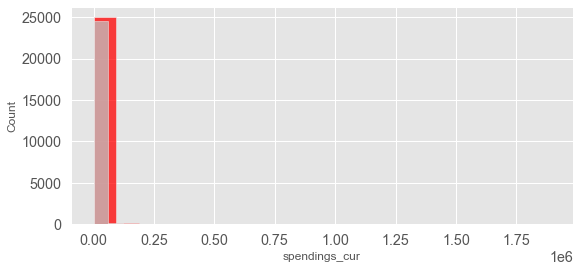

In [286]:
sns.histplot(data = spend_0.spendings_cur, color='red', bins = 20)
sns.histplot(data = spend_1.spendings_cur, color='silver', bins= 20)

<AxesSubplot:xlabel='spendings_cur'>

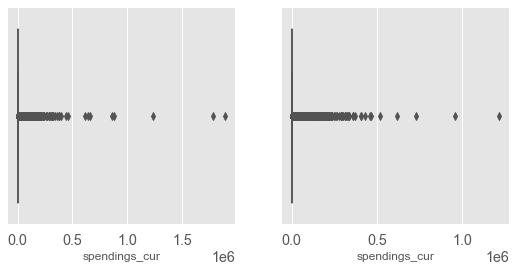

In [287]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data = spend[spend['exp_group']==0],  x = 'spendings_cur',  ax=axs[0])
sns.boxplot(data = spend[spend['exp_group']==1], x = 'spendings_cur', ax=axs[1])

  0%|          | 0/10000 [00:00<?, ?it/s]

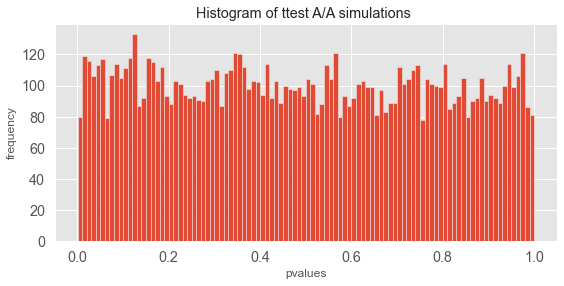

0.053

In [288]:
aa_test_ttest(spend_0.spendings_cur)

In [289]:
stats.ttest_ind(spend_0.spendings_cur, spend_1.spendings_cur)

Ttest_indResult(statistic=-0.7027445118709562, pvalue=0.4822182493035848)

In [354]:
p_ttest_arpu = stats.ttest_ind(spend_0.spendings_cur, spend_1.spendings_cur)[1]
    
diff_arpu = spend_1.spendings_cur.mean()-spend_0.spendings_cur.mean()
diff_abs_arpu = diff*100/spend_0.spendings_cur.mean()

mde_arpu = get_mde(len(spend_0),
      np.std((spend_0.spendings_cur), ddof=1),
      len(spend_1),
      np.std((spend_1.spendings_cur), ddof=1), alpha=0.05, power=0.8)
        
spending_full_df_arpu = pd.DataFrame({'metric_name':['arpu'], 'device':['full'], 'diff':diff_arpu,
                                'diff%':diff_abs_arpu, 'mde':mde_arpu, 'p_val_ttest':p_ttest_arpu})
spending_full_df_arpu

,metric_name,device,diff,diff%,mde,p_val_ttest
0,arpu,full,151.873523,0.000251,604.908047,0.482218


In [297]:
metric_name_s_dev = [] 
device_s_dev = []
diff_lst_s_dev = []
diff_abs_lst_s_dev = []
p_val_ttest_s_dev = []
mde_lst_s_dev = []


for i in range(len(devices)):
    spend_new = spend[spend['device']==devices[i]]
    spend_d = spend_new[['exp_group','user_id','spendings_cur']]
    
    contr_spend = spend_d[spend_d['exp_group']==0]
    test_spend = spend_d[spend_d['exp_group']==1]

    p_ttest = stats.ttest_ind(contr_spend.spendings_cur, test_spend.spendings_cur)[1]

    diff = test_spend.spendings_cur.mean()-contr_spend.spendings_cur.mean()

    diff_abs = diff*100/contr_spend.spendings_cur.mean()

    mde = get_mde(len(contr_spend),
          np.std((contr_spend.spendings_cur), ddof=1),
          len(test_spend),
          np.std((test_spend.spendings_cur), ddof=1), alpha=0.05, power=0.8)
        
    metric_name_s_dev.append('arpu')
    device_s_dev.append(devices[i])
    diff_lst_s_dev.append(diff)
    diff_abs_lst_s_dev.append(diff_abs)
    mde_lst_s_dev.append(mde)
    p_val_ttest_s_dev.append(p_ttest)

result_df_spend = pd.DataFrame({'metric_name':metric_name_s_dev, 'device':device_s_dev, 'diff':diff_lst_s_dev,
                        'diff%':diff_abs_lst_s_dev, 'mde':mde_lst_s_dev,'p_val_ttest':p_val_ttest_s_dev})

    
result_df_2 = pd.concat([result_df_spend, spending_full_df], axis=0, join="inner")
result_df_2

,metric_name,device,diff,diff%,mde,p_val_ttest
0,arpu,desktop,177.908028,3.115963,1172.770530,0.670799
1,arpu,mobile,84.952438,7.700673,353.943585,0.501380
2,arpu,tablet,-23.666366,-1.566598,1756.010397,0.970526
0,arpu,full,151.873523,4.519022,604.908047,0.482218


### 3.2.2 ARPPU

In [315]:
spend_arppu = revenue[['exp_group','user_id', 'device', 'spendings_cur']]
spend_arppu = spend_arppu[spend_arppu['spendings_cur']>0]
spend_0_arppu = spend_arppu[spend_arppu['exp_group']==0]
spend_1_arppu = spend_arppu[spend_arppu['exp_group']==1]

In [350]:
print(f'mean_spend_0 {spend_0_arppu.spendings_cur.mean()}')
print(f'mean_spend_1 {spend_1_arppu.spendings_cur.mean()}')

mean_spend_0 24332.138347725944
mean_spend_1 23970.145483164524


<AxesSubplot:xlabel='spendings_cur', ylabel='Count'>

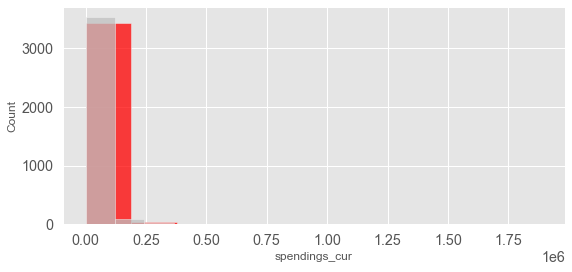

In [333]:
sns.histplot(data = spend_0_arppu.spendings_cur, color='red', bins = 10)
sns.histplot(data = spend_1_arppu.spendings_cur, color='silver', bins= 10)

<AxesSubplot:xlabel='spendings_cur', ylabel='Count'>

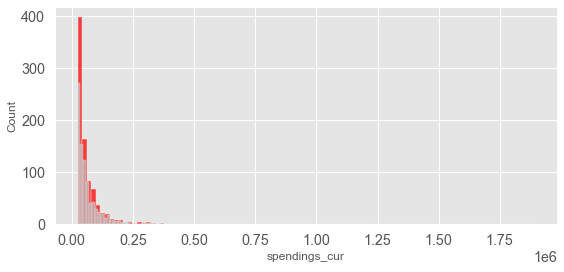

In [340]:
sns.histplot(data = spend_0_arppu[spend_0_arppu['spendings_cur']>24332].spendings_cur, color='red', bins = 100)
sns.histplot(data = spend_1_arppu[spend_1_arppu['spendings_cur']>23970].spendings_cur, color='silver', bins= 100)

<AxesSubplot:xlabel='spendings_cur'>

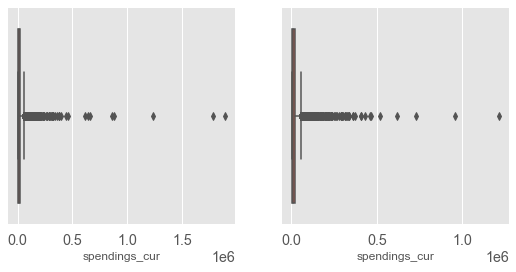

In [336]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data = spend_0_arppu,  x = 'spendings_cur',  ax=axs[0])
sns.boxplot(data = spend_1_arppu, x = 'spendings_cur', ax=axs[1])

  0%|          | 0/10000 [00:00<?, ?it/s]

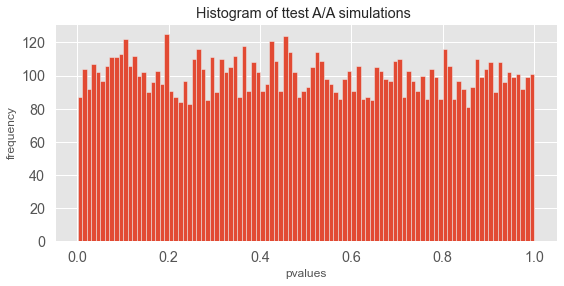

0.0486

In [337]:
aa_test_ttest(spend_0_arppu.spendings_cur)

In [341]:
stats.ttest_ind(spend_0_arppu.spendings_cur, spend_1_arppu.spendings_cur)

Ttest_indResult(statistic=0.2542459998594759, pvalue=0.7993128519206933)

In [349]:
spend_0_log = np.log(spend_0_arppu.spendings_cur)
spend_1_log = np.log(spend_1_arppu.spendings_cur)

print(f'mean_spend_0_log {spend_0_log.mean()}')
print(f'mean_spend_1_log {spend_1_log.mean()}')

mean_spend_0_log 9.01331845782953
mean_spend_1_log 9.005320850964601


<AxesSubplot:xlabel='spendings_cur', ylabel='Count'>

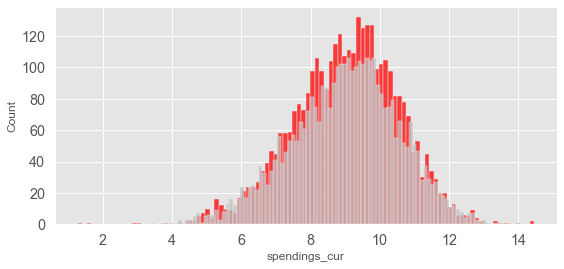

In [345]:
sns.histplot(data = spend_0_log, color='red', bins = 100)
sns.histplot(data = spend_1_log, color='silver', bins= 100)

In [351]:
stats.ttest_ind(spend_0_log, spend_1_log)

Ttest_indResult(statistic=0.21748026412378743, pvalue=0.8278403132866219)

In [356]:
p_ttest_arppu = stats.ttest_ind(spend_0_arppu.spendings_cur, spend_1_arppu.spendings_cur)[1]
    
diff_arppu = spend_1_arppu.spendings_cur.mean()-spend_0_arppu.spendings_cur.mean()
diff_abs_arppu = diff*100/spend_0_arppu.spendings_cur.mean()

mde_arppu = get_mde(len(spend_0_arppu),
      np.std((spend_0_arppu.spendings_cur), ddof=1),
      len(spend_1_arppu),
      np.std((spend_1_arppu.spendings_cur), ddof=1), alpha=0.05, power=0.8)
        
spending_full_df_arppu = pd.DataFrame({'metric_name':['arppu'], 'device':['full'], 'diff':diff_arppu,
                                'diff%':diff_abs_arppu, 'mde':mde_arppu, 'p_val_ttest':p_ttest_arppu})
spending_full_df_arppu

,metric_name,device,diff,diff%,mde,p_val_ttest
0,arppu,full,-361.992865,0.000035,4015.312708,0.799313


In [360]:
metric_name_arppu = [] 
device_s_arppu = []
diff_lst_s_arppu = []
diff_abs_lst_s_arppu = []
p_val_ttest_s_arppu = []
mde_lst_s_arppu = []


for i in range(len(devices)):
    spend_arppu_f = spend_arppu[spend_arppu['device']==devices[i]]
    spend_arppu_d = spend_arppu_f[['exp_group','user_id','spendings_cur']]
    
    contr_spend_arppu = spend_arppu_d[spend_arppu_d['exp_group']==0]
    test_spend_arppu = spend_arppu_d[spend_arppu_d['exp_group']==1]

    p_ttest = stats.ttest_ind(contr_spend_arppu.spendings_cur, test_spend_arppu.spendings_cur)[1]

    diff = test_spend_arppu.spendings_cur.mean()-contr_spend_arppu.spendings_cur.mean()
    diff_abs = diff*100/contr_spend_arppu.spendings_cur.mean()

    mde = get_mde(len(contr_spend_arppu),
          np.std((contr_spend_arppu.spendings_cur), ddof=1),
          len(test_spend_arppu),
          np.std((test_spend_arppu.spendings_cur), ddof=1), alpha=0.05, power=0.8)
        
    metric_name_arppu.append('arppu')
    device_s_arppu.append(devices[i])
    diff_lst_s_arppu.append(diff)
    diff_abs_lst_s_arppu.append(diff_abs)
    mde_lst_s_arppu.append(mde)
    p_val_ttest_s_arppu.append(p_ttest)

result_df_spend_arppu = pd.DataFrame({'metric_name':metric_name_arppu, 'device':device_s_arppu, 'diff':diff_lst_s_arppu,
                        'diff%':diff_abs_lst_s_arppu, 'mde':mde_lst_s_arppu, 'p_val_ttest':p_val_ttest_s_arppu})

    
result_df_3 = pd.concat([result_df_spend_arppu, spending_full_df_arppu], axis=0, join="inner")
result_df_3

,metric_name,device,diff,diff%,mde,p_val_ttest
0,arppu,desktop,-338.330934,-1.242008,5185.041423,0.854064
1,arppu,mobile,12.183609,0.076449,4498.364277,0.993935
2,arppu,tablet,-5907.065843,-34.660970,15484.808696,0.247763
0,arppu,full,-361.992865,0.000035,4015.312708,0.799313


In [ ]:
revenue_cur = full_exp[['exp_group', 'user_id', 'spendings_cur']]
revenue_cur = revenue_cur[revenue_cur['spendings_cur']>0]
revenue_cur['spendings_cur_log'] = np.log(revenue_cur['spendings_cur'] )

In [ ]:
revenue_cur

In [ ]:
print(f'{revenue_cur.spendings_cur.std()}')
print(f'{revenue_cur.spendings_cur_log.std()}')
print(f'{revenue_cur.spendings_cur.mean()}')
print(f'{revenue_cur.spendings_cur_log.mean()}')

In [ ]:
sns.histplot(revenue_cur.spendings_cur)

In [ ]:
sns.histplot(revenue_cur[revenue_cur['exp_group']==0].spendings_cur_log)
sns.histplot(revenue_cur[revenue_cur['exp_group']==1].spendings_cur_log)

In [ ]:
sns.histplot(revenue_cur[revenue_cur['exp_group']==0].spendings_cur)
sns.histplot(revenue_cur[revenue_cur['exp_group']==1].spendings_cur)

In [ ]:
sns.boxplot(data = revenue_cur, x = 'spendings_cur' )

In [ ]:
sns.boxplot(data = revenue_cur[revenue_cur['exp_group']==0], x = 'spendings_cur_log')

In [ ]:
sns.boxplot(data = revenue_cur[revenue_cur['exp_group']==1], x = 'spendings_cur_log')

In [ ]:
revenue_cur.describe()

In [ ]:
revenue_cur.spendings_cur.max()

In [ ]:
stats.ttest_ind(revenue_cur[revenue_cur['exp_group']==0].spendings_cur_log, revenue_cur[revenue_cur['exp_group']==1].spendings_cur_log)

In [ ]:
stats.ttest_ind(revenue_cur[revenue_cur['exp_group']==0].spendings_cur, revenue_cur[revenue_cur['exp_group']==1].spendings_cur)

# n_sessions–per_user 

In [ ]:
full_exp[['exp_group', 'user_id', 'session_cnt_cur', 'session_cnt_bfr']]

In [ ]:
session_cnt = full_exp[['exp_group', 'user_id', 'session_cnt_cur', 'session_cnt_bfr']]

In [ ]:
session_cnt_c = full_exp[['exp_group', 'user_id', 'session_cnt_cur']]

In [ ]:
session_cnt_c.describe()

In [ ]:
session_cnt_c_0 = session_cnt_c[session_cnt_c['exp_group']==0]
session_cnt_c_1 = session_cnt_c[session_cnt_c['exp_group']==1]

In [ ]:
sns.boxplot(data = session_cnt_c_0, x = 'session_cnt_cur')

In [ ]:
sns.boxplot(data = session_cnt_c_1, x = 'session_cnt_cur')

In [ ]:
sns.histplot(session_cnt_c_0[session_cnt_c_0['session_cnt_cur']!=0].session_cnt_cur)
sns.histplot(session_cnt_c_1[session_cnt_c_1['session_cnt_cur']!=0].session_cnt_cur)

In [ ]:
sns.histplot(np.log(session_cnt_c_0[session_cnt_c_0['session_cnt_cur']!=0].session_cnt_cur))
sns.histplot(np.log(session_cnt_c_1[session_cnt_c_1['session_cnt_cur']!=0].session_cnt_cur))

In [ ]:
stats.ttest_ind(session_cnt_c_0.session_cnt_cur, session_cnt_c_1.session_cnt_cur)

## avg_session_log_lengh–per_user 

In [ ]:
total_session_log_length = full_exp[['exp_group', 'user_id', 'total_session_log_length_cur', 'total_session_log_length_bfr']]

In [ ]:
total_session_log_length

In [ ]:
total_session_log_len = total_session_log_length[['exp_group', 'user_id', 'total_session_log_length_cur']]

In [ ]:
total_session_log_len.describe()

In [ ]:
total_session_log_len[total_session_log_len['exp_group']==0].total_session_log_length_cur.mean()

In [ ]:
total_session_log_len[total_session_log_len['exp_group']==1].total_session_log_length_cur.mean()

In [ ]:
sns.histplot(total_session_log_len[total_session_log_len['exp_group']==0].total_session_log_length_cur)
sns.histplot(total_session_log_len[total_session_log_len['exp_group']==1].total_session_log_length_cur)

In [ ]:
sns.boxplot(data = total_session_log_len[total_session_log_len['exp_group']==0], x = 'total_session_log_length_cur')

In [ ]:
sns.boxplot(data = total_session_log_len[total_session_log_len['exp_group']==1], x = 'total_session_log_length_cur')

In [ ]:
stats.ttest_ind(total_session_log_len[total_session_log_len['exp_group']==0].total_session_log_length_cur,
               total_session_log_len[total_session_log_len['exp_group']==1].total_session_log_length_cur)

## 3.3. Ratio

In [57]:
average_check = full_exp[['exp_group', 'user_id', 'spendings_cur']]

In [58]:
average_check_contr = average_check[average_check['exp_group']==0]
koef = average_check_contr.spendings_cur.sum()/average_check_contr.spendings_cur.count()
koef

3360.760520833333

In [59]:
lin_avg_chk_df = average_check.groupby(['exp_group', 'user_id'], as_index=False)\
                                    .agg(sum_price=('spendings_cur', 'sum'), count_purch=('spendings_cur', 'count'))
lin_avg_chk_df['avg_check'] = lin_avg_chk_df['sum_price']/lin_avg_chk_df['count_purch']
lin_avg_chk_df['lin_avg_chk'] = lin_avg_chk_df['sum_price']-koef*lin_avg_chk_df['count_purch']
lin_avg_chk_df.head()

,exp_group,user_id,sum_price,count_purch,avg_check,lin_avg_chk
0,0,125741107230500,0.0,1,0.0,-3360.760521
1,0,667585499425385,0.0,1,0.0,-3360.760521
2,0,681720336100105,0.0,1,0.0,-3360.760521
3,0,808009533082155,0.0,1,0.0,-3360.760521
4,0,1060467734156393,0.0,1,0.0,-3360.760521


In [60]:
lin_avg_chk_df.describe()

,exp_group,user_id,sum_price,count_purch,avg_check,lin_avg_chk
count,50007.00000,5.000700e+04,5.000700e+04,50007.000000,5.000700e+04,5.000700e+04
mean,0.49775,4.607719e+18,3.441374e+03,1.001460,3.435975e+03,7.570746e+01
std,0.50000,2.670218e+18,2.421852e+04,0.046665,2.418899e+04,2.421813e+04
min,0.00000,1.257411e+14,0.000000e+00,1.000000,0.000000e+00,-1.344304e+04
25%,0.00000,2.310021e+18,0.000000e+00,1.000000,0.000000e+00,-3.360761e+03
50%,0.00000,4.584293e+18,0.000000e+00,1.000000,0.000000e+00,-3.360761e+03
75%,1.00000,6.925009e+18,0.000000e+00,1.000000,0.000000e+00,-3.360761e+03
max,1.00000,9.223273e+18,1.889594e+06,4.000000,1.889594e+06,1.886233e+06


In [61]:
lin_avg_chk_df[lin_avg_chk_df['exp_group']==0].lin_avg_chk.mean()

1.525359060805526e-11

In [62]:
lin_avg_chk_df[lin_avg_chk_df['exp_group']==1].lin_avg_chk.mean()

152.09928032888703

<AxesSubplot:xlabel='lin_avg_chk', ylabel='Count'>

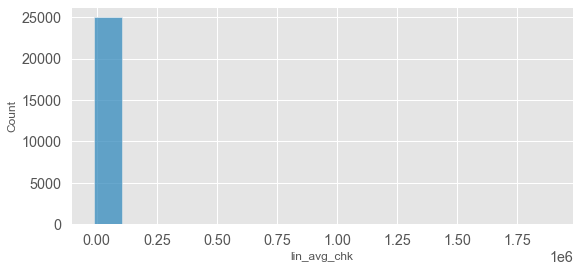

In [63]:
sns.histplot(data = lin_avg_chk_df[lin_avg_chk_df['exp_group']==0], x = 'lin_avg_chk')

In [64]:
stats.ttest_ind(lin_avg_chk_df[lin_avg_chk_df['exp_group']==0].lin_avg_chk,
               lin_avg_chk_df[lin_avg_chk_df['exp_group']==1].lin_avg_chk)

Ttest_indResult(statistic=-0.702207345354302, pvalue=0.48255313393319843)